The rent of a house depends on a lot of factors. With appropriate data and Machine Learning techniques, many real estate platforms find the housing options according to the customer’s budget. So, if you want to learn how to use Machine Learning to predict the rent of a house, this article is for you. In this article, I will take you through the task of House Rent Prediction with Machine Learning using Python.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Content
Within this dataset, you will find a comprehensive collection of data pertaining to nearly 4700+ available residential properties, encompassing houses, apartments, and flats offered for rent. This dataset is rich with various attributes, including the number of bedrooms (BHK), rental rates, property size, number of floors, area type, locality, city, furnishing status, tenant preferences, bathroom count, and contact information for the respective point of contact.

#### House Rent Prediction
The rent of a housing property depends on a lot of factors like:

 1.number of bedrooms, hall, and kitchen

 2.size of the property

 3.the floor of the house

 4.area type

 5.area locality

 6.City

 7.furnishing status of the house

To build a house rent prediction system, we need data based on the factors affecting the rent of a housing property. I found a dataset from Kaggle which includes all the features we need.

**Import necessary libraries of python**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Revise/House_rent_prediction/House_Rent_Dataset.csv")

In [4]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,04-05-2022,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**all the data types are in correct way**

Let's check data set contain any null valur or not

In [7]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

data set does not contain any null value

### Lets check the statastics term of data set

In [8]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
# In the dataset we can analyse the skeewness by looking at mean and median values

In [10]:
# Lets check statastics values for rent

In [11]:
print(f"Mean Rent:{data.Rent.mean()}")
print(f"Median Rent:{data.Rent.median()}")
print(f"Highest Rent:{data.Rent.max()}")
print(f"Lowest Rent:{data.Rent.min()}")

Mean Rent:34993.45132743363
Median Rent:16000.0
Highest Rent:3500000
Lowest Rent:1200


In [12]:
# We can see the data is regth skiwed

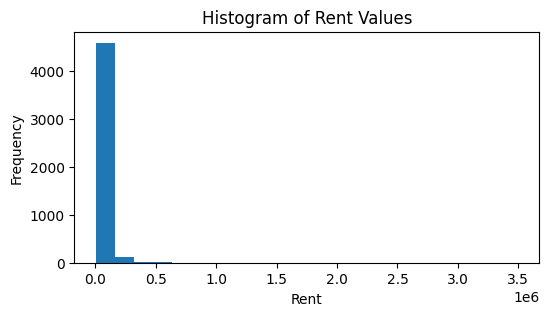

In [13]:
plt.figure(figsize=(6,3))
plt.hist(data['Rent'], bins=22)
plt.title('Histogram of Rent Values')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

**Now let’s have a look at the rent of the houses in different cities according to the number of bedrooms, halls, and kitchens:**

In [14]:
figure = px.histogram(data, x=data["City"],
                y = data["Rent"],
                color = data["BHK"],
            title="Rent in Different Cities According to BHK")
figure.show()

In [15]:
# As we can see in Mumbai city flat rent is highest than other cities in India

**Now let’s have a look at the rent of the houses in different cities according to the area type:**

In [16]:
figure = px.histogram(data, x=data["City"],
                y = data["Rent"],
                color = data["Area Type"],
            title="Rent in Different Cities According to BHK")
figure.show()

**Now let’s have a look at the rent of the houses in different cities according to the furnishing status of the house:**

In [17]:
figure = px.histogram(data, x=data["City"],
                y = data["Rent"],
                color = data["Furnishing Status"],
            title="Rent in Different Cities According to BHK")
figure.show()

In [18]:
# As we can see furnish flat is having more rent than semi and unfurnished flat

**Now let’s have a look at the rent of the houses in different cities according to the size of the house:**

In [19]:
figure = px.histogram(data, x=data["City"],
                y = data["Rent"],
                color = data["Size"],
            title="Rent in Different Cities According to BHK")
figure.show()

In [20]:
# From above plot it is bit diffucult to check the relation

### Now let’s have a look at the number of houses available for rent in different cities according to the dataset:**

In [21]:
cities = data["City"].value_counts()

In [22]:
print(cities)

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


In [23]:
label = cities.index
counts = cities.values
color = ['gold','green']

fig = go.Figure(data=[go.Pie(labels=label,values=counts,hole=0.6)])
fig.update_layout(title_text='Number of Houses Available for Rent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=color, line=dict(color='black', width=3)))
fig.show()

### Now let’s have a look at the number of houses available for different types of tenants:

In [24]:
data["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [25]:
# Preference of Tenant
tenant = data["Tenant Preferred"].value_counts()
label = tenant.index
counts = tenant.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.6)])
fig.update_layout(title_text='Preference of Tenant in India')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [26]:
# To build the model it is essential to convert all categorical feature in to numericl
# Because machine will understand only numerical variables

In [27]:
data.columns.tolist()

['Posted On',
 'BHK',
 'Rent',
 'Size',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact']

In [28]:
for i in data.columns:
    if data[i].dtypes==object:
        print (i)

Posted On
Floor
Area Type
Area Locality
City
Furnishing Status
Tenant Preferred
Point of Contact


In [29]:
# We will be using some important features to evaluate our model
#["Area Type", "City", "Furnishing Status", "Tenant Preferred"]

In [30]:
data.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


In [31]:
data["Area Type"] = data["Area Type"].map({"Super Area": 1,
                                          "Carpet Area": 2,
                                          "Built Area": 3})
data["City"] = data["City"].map({"Mumbai": 4000, "Chennai": 6000,
                                 "Bangalore": 5600, "Hyderabad": 5000,
                                 "Delhi": 1100, "Kolkata": 7000})

data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 0,
                                                           "Semi-Furnished": 1,
                                                           "Furnished": 2})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2,
                                                         "Bachelors": 1,
                                                         "Family": 3})
print(data.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  18-05-2022    2  10000  1100  Ground out of 2          1   
1  13-05-2022    2  20000   800       1 out of 3          1   
2  16-05-2022    2  17000  1000       1 out of 3          1   
3  04-07-2022    2  10000   800       1 out of 2          1   
4  09-05-2022    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel  7000                  0                 2   
1  Phool Bagan, Kankurgachi  7000                  1                 2   
2   Salt Lake City Sector 2  7000                  1                 2   
3               Dumdum Park  7000                  0                 2   
4             South Dum Dum  7000                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

In [32]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,1,Bandel,7000,0,2,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",7000,1,2,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,7000,1,2,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,1,Dumdum Park,7000,0,2,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,2,South Dum Dum,7000,0,1,1,Contact Owner


In [33]:
data.drop(["Posted On","Floor","Area Locality","Point of Contact"],axis=1)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1,7000,0,2,2
1,2,20000,800,1,7000,1,2,1
2,2,17000,1000,1,7000,1,2,1
3,2,10000,800,1,7000,0,2,1
4,2,7500,850,2,7000,0,1,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,5000,1,2,2
4742,3,29000,2000,1,5000,1,2,3
4743,3,35000,1750,2,5000,1,2,3
4744,3,45000,1500,2,5000,1,3,2


In [34]:
# Now our dataset is read to build model

In [35]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X = np.array(data[["BHK","Size","Area Type","City","Furnishing Status","Tenant Preferred","Bathroom"]])
y = np.array(data[["Rent"]])

In [36]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.1, random_state = 42)

### Now let’s train a house rent prediction model using an LSTM neural network model:

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences= True,
              input_shape = (X_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train,y_train, batch_size = 1, epochs = 20 )

Epoch 1/20
4271/4271 [==============================] - 29s 6ms/step - loss: 7101774848.0000
Epoch 2/20
4271/4271 [==============================] - 27s 6ms/step - loss: 6472360448.0000
Epoch 3/20
4271/4271 [==============================] - 27s 6ms/step - loss: 6179286528.0000
Epoch 4/20
4271/4271 [==============================] - 26s 6ms/step - loss: 5959387648.0000
Epoch 5/20
4271/4271 [==============================] - 27s 6ms/step - loss: 5772171264.0000
Epoch 6/20
4271/4271 [==============================] - 27s 6ms/step - loss: 5639299584.0000
Epoch 7/20
4271/4271 [==============================] - 27s 6ms/step - loss: 5562697216.0000
Epoch 8/20
4271/4271 [==============================] - 27s 6ms/step - loss: 5503442432.0000
Epoch 9/20
4271/4271 [==============================] - 26s 6ms/step - loss: 5498496512.0000
Epoch 10/20
4271/4271 [==============================] - 27s 6ms/step - loss: 5466534400.0000
Epoch 11/20
4271/4271 [==============================] - 26s 6ms/step

## Now here’s how to predict the rent of a housing property using the trained model:`

In [40]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 4
Size of the House: 850
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2
Pin Code of the City: 4000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 1
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 3
Number of bathrooms: 2
1/1 [==============================] - 1s 541ms/step
Predicted House Price =  [[66070.055]]


# **By building the model we can check the price of flat rent in the given city by specifying our requirement related to flat**

# **Summary**
## **So this is how to use Machine Learning to predict the rent of a housing property. With appropriate data and Machine Learning techniques, many real estate platforms find the housing options according to the customer’s budget.**